In [3]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../../pyscan')

import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Could not load Keysight SD1
Could not load Keysight SD1
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBSC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [4]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [5]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [6]:
def change_v1andv3(value):
    devices.v1.voltage = value
    devices.v3.voltage = 2*value

In [7]:
# 1D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.FunctionScan(change_v1andv3, ps.drange(0, 0.1, 1), dt=0.5)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.run()


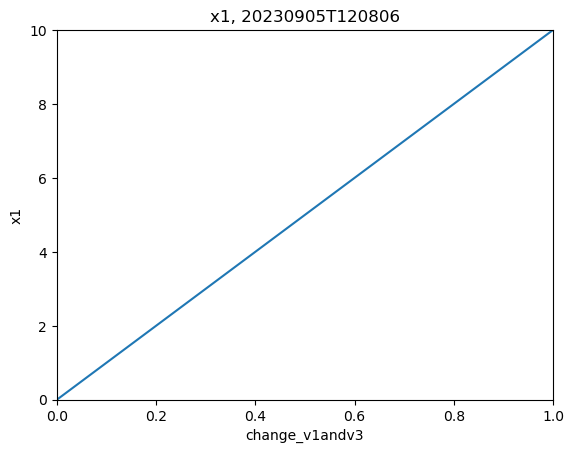

In [8]:
ps.live_plot1D(expt)

In [9]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.FunctionScan(change_v1andv3, ps.drange(0, 0.1, 1), dt=0.5)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.5)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


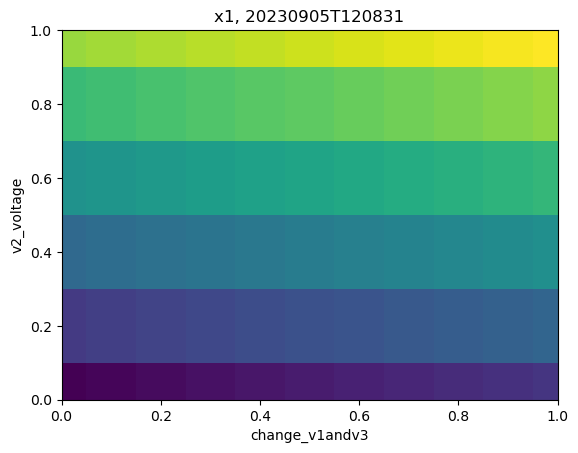

In [10]:
ps.live_plot2D(expt)